<a href="https://colab.research.google.com/github/zaaraquadrii/Zaara_Projects_Labs/blob/main/Module_5_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions

## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


# 1. Regression


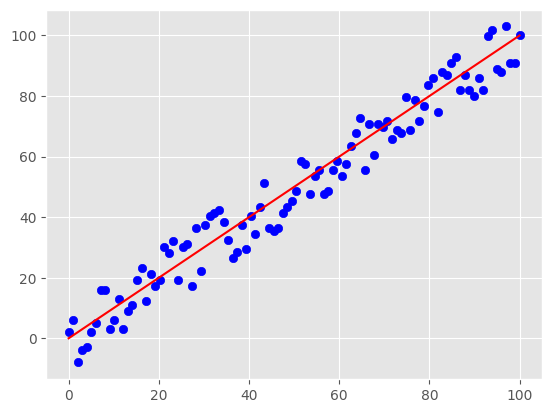

In [2]:
np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

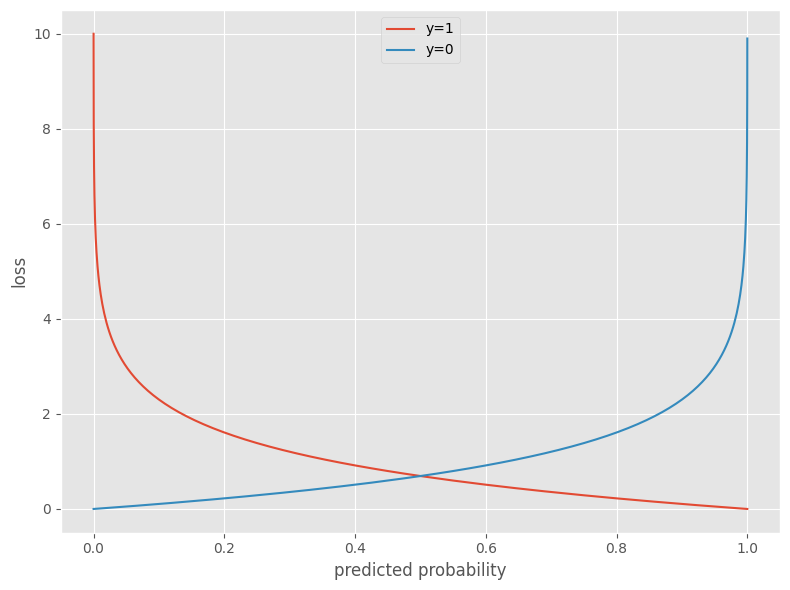

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

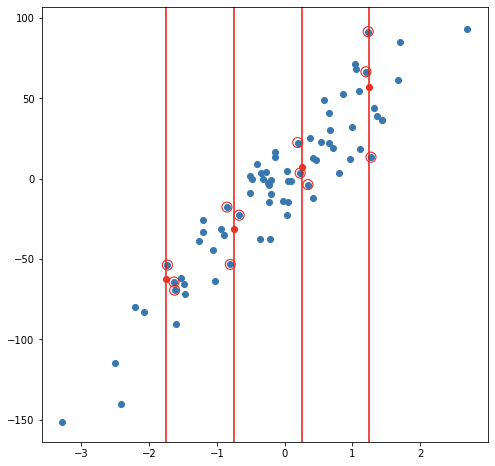

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [8]:
def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

/tmp/ipython-input-578049380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
/tmp/ipython-input-578049380.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

# Task
Analyze the performance of different regression loss functions (MSE and MAE) and the impact of varying K values in KNN-regression on a given dataset. Additionally, explore other regression loss functions and analyze the edge cases for K in KNN-regression (K=1 and K=size of training dataset).

## Evaluate regression loss functions

In [12]:
model = neighbors.KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

print("MSE for KNN (k=5): {}".format(mse))
print("MAE for KNN (k=5): {}".format(mae))

MSE for KNN (k=5): 1654602.7916339007
MAE for KNN (k=5): 920.5455474071177


## Explore other loss functions


In [13]:
print("Huber Loss:")
print("Formula: Lδ(y, f(x)) = 0.5 * (y - f(x))² if |y - f(x)| <= δ")
print("                      = δ * |y - f(x)| - 0.5 * δ² if |y - f(x)| > δ")
print("Use Case: Huber loss is less sensitive to outliers than MSE and smoother around the minimum than MAE. It's often used in robust regression.")
print("Advantages over MSE/MAE: Less affected by outliers than MSE, smoother than MAE.")
print("Disadvantages compared to MSE/MAE: Requires tuning the hyperparameter δ.")
print("-" * 20)

print("Log-Cosh Loss:")
print("Formula: L(y, f(x)) = log(cosh(y - f(x)))")
print("Use Case: Log-cosh loss is a smooth loss function that is less sensitive to large errors than MSE. It is used in regression tasks where a smooth loss function is desirable.")
print("Advantages over MSE/MAE: Smooth everywhere, unlike MAE. Less sensitive to outliers than MSE.")
print("Disadvantages compared to MSE/MAE: More computationally expensive than MSE or MAE.")
print("-" * 20)

Huber Loss:
Formula: Lδ(y, f(x)) = 0.5 * (y - f(x))² if |y - f(x)| <= δ
                      = δ * |y - f(x)| - 0.5 * δ² if |y - f(x)| > δ
Use Case: Huber loss is less sensitive to outliers than MSE and smoother around the minimum than MAE. It's often used in robust regression.
Advantages over MSE/MAE: Less affected by outliers than MSE, smoother than MAE.
Disadvantages compared to MSE/MAE: Requires tuning the hyperparameter δ.
--------------------
Log-Cosh Loss:
Formula: L(y, f(x)) = log(cosh(y - f(x)))
Use Case: Log-cosh loss is a smooth loss function that is less sensitive to large errors than MSE. It is used in regression tasks where a smooth loss function is desirable.
Advantages over MSE/MAE: Smooth everywhere, unlike MAE. Less sensitive to outliers than MSE.
Disadvantages compared to MSE/MAE: More computationally expensive than MSE or MAE.
--------------------


## Knn-regression with different k values



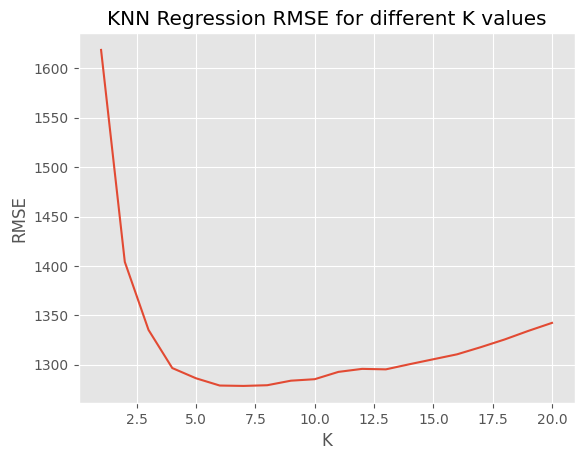

In [14]:
rmse_val = []
k_range = range(1, 21)
for k in k_range:
    knn_regression(k, x_train, y_train, x_test, y_test)

plt.plot(k_range, rmse_val)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('KNN Regression RMSE for different K values')
plt.show()

## Analyze edge cases for k



In [15]:
model_k1 = neighbors.KNeighborsRegressor(n_neighbors=1)
model_k1.fit(x_train, y_train)
y_pred_k1 = model_k1.predict(x_test)
rmse_k1 = sqrt(mean_squared_error(y_test, y_pred_k1))

n_train = len(x_train)
model_n_train = neighbors.KNeighborsRegressor(n_neighbors=n_train)
model_n_train.fit(x_train, y_train)
y_pred_n_train = model_n_train.predict(x_test)
rmse_n_train = sqrt(mean_squared_error(y_test, y_pred_n_train))

print("RMSE for K=1: {}".format(rmse_k1))
print("RMSE for K=size of training dataset ({}): {}".format(n_train, rmse_n_train))

RMSE for K=1: 1618.5717643577884
RMSE for K=size of training dataset (5966): 1791.1338152029762


Summary of Regression Loss Functions:
---
Mean Squared Error (MSE):
Calculated MSE for KNN (k=5): 1654602.7916
MSE penalizes larger errors more heavily due to the squaring term. This makes it sensitive to outliers but provides a clear gradient for optimization.

Mean Absolute Error (MAE):
Calculated MAE for KNN (k=5): 920.5455
MAE measures the average magnitude of errors without considering their direction. It is less sensitive to outliers than MSE as it doesn't square the errors.

Other Loss Functions Explored:
Huber Loss: A hybrid of MSE and MAE, less sensitive to outliers than MSE and smoother than MAE. Useful in robust regression.
Log-Cosh Loss: A smooth function that is less sensitive to large errors than MSE. Suitable when a smooth loss function is desired.



---



Summary of KNN-Regression with Varying K:
---
Trend in RMSE Plot:
The plot of RMSE versus K shows that initially, as K increases from 1, the RMSE generally decreases, indicating improved performance as the model considers more neighbors, reducing variance. After reaching an optimal point, further increasing K can lead to an increase in RMSE as the model becomes too simple and biased.
Optimal K: The plot suggests that there is an optimal K value that minimizes RMSE, representing a balance between bias and variance.

Edge Cases for K:
RMSE for K=1: 1618.5718
With K=1, the model is highly sensitive to individual training data points, leading to high variance and potential overfitting. The RMSE is relatively high compared to optimal K values.
RMSE for K=size of training dataset (5966): 1791.1338
With K equal to the training dataset size, the model predicts the average of all training values, resulting in high bias and a simple model that doesn't capture local patterns. The RMSE is generally higher than for smaller K values, indicating underfitting.

Overall Conclusion:
Choosing an appropriate loss function depends on the data and the desired behavior regarding outliers. For KNN-regression, the hyperparameter K significantly impacts the model's performance due to the bias-variance trade-off. Finding an optimal K is crucial for achieving the best results.




---




## Summary:

### Data Analysis Key Findings

*   For a KNN-regression model with K=5, the Mean Squared Error (MSE) was approximately 1,654,602.79 and the Mean Absolute Error (MAE) was approximately 920.55. The significant difference highlights MSE's greater sensitivity to larger errors compared to MAE.
*   Beyond MSE and MAE, other regression loss functions exist, such as Huber Loss (which is less sensitive to outliers than MSE and smoother than MAE) and Log-Cosh Loss (a smooth function less sensitive to large errors than MSE).
*   Analyzing KNN-regression performance across a range of K values showed a typical trend where RMSE generally decreases as K increases from 1, reaches an optimal minimum, and then increases again for larger K values. This demonstrates the bias-variance trade-off; smaller K values can lead to high variance (overfitting), while larger K values can lead to high bias (underfitting).
*   Evaluating the edge cases for K in KNN-regression revealed that for K=1, the RMSE was approximately 1618.57, indicating high variance and potential overfitting due to sensitivity to individual data points. For K equal to the size of the training dataset (5966), the RMSE was approximately 1791.13, demonstrating high bias and underfitting as the model simply predicts the average of the training data.

### Insights or Next Steps

*   The choice of regression loss function should be guided by the data's characteristics, particularly the presence and impact of outliers. MAE is more robust to outliers than MSE.
*   Tuning the hyperparameter K in KNN-regression is crucial for achieving optimal performance, as it directly influences the bias-variance trade-off. Visualizing the error across different K values is a good approach to identify a suitable range for K.
